In [1]:
import sys
from pathlib import Path

# puja fins al root del projecte (ajusta el nombre de parents si cal)
PROJECT_ROOT = Path.cwd().resolve()

while not (PROJECT_ROOT / "settings.py").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

sys.path.insert(0, str(PROJECT_ROOT))

print("PROJECT_ROOT =", PROJECT_ROOT)

PROJECT_ROOT = /home/lluis/master-thesis/CSISD


In [2]:
import polars as pl
from src.utils.plot import plot_pitchcurve_svara_window, plot_segment_multiplot
from src.io.pitch_io import load_preprocessed_pitch
from settings import SARASUDA_VARNAM, DATA_INTERIM, DATA_PROCESSED, DATA_CORPUS, SARASUDA_TONICS


In [3]:
DATA_INTERIM = PROJECT_ROOT / "data" / "interim"
PROJECT_ROOT, DATA_INTERIM
FEATURE_GLOB = "*/features/*svara_features.parquet"
PREPROCESSED_GLOB = "*/pitch/*pitch_preprocessed.parquet"

In [4]:


ID_COLS = {
    "recording_id", "piece_id", "file",
    "svara_id",
    "svara_start_sec", "svara_end_sec", "svara_duration_sec", "svara_n_rows",
}

LABEL_COLS_CANDIDATES = {
    "svara_label", "prev_svara", "next_svara",
    "section_label",
    "svara_lower", "svara_upper",
}

feature_paths = sorted(DATA_INTERIM.glob(PREPROCESSED_GLOB))
len(feature_paths), feature_paths[:5]

(5,
 [PosixPath('/home/lluis/master-thesis/CSISD/data/interim/srs_v1_bdn_sav/pitch/srs_v1_bdn_sav_pitch_preprocessed.parquet'),
  PosixPath('/home/lluis/master-thesis/CSISD/data/interim/srs_v1_drn_sav/pitch/srs_v1_drn_sav_pitch_preprocessed.parquet'),
  PosixPath('/home/lluis/master-thesis/CSISD/data/interim/srs_v1_psn_sav/pitch/srs_v1_psn_sav_pitch_preprocessed.parquet'),
  PosixPath('/home/lluis/master-thesis/CSISD/data/interim/srs_v1_rkm_sav/pitch/srs_v1_rkm_sav_pitch_preprocessed.parquet'),
  PosixPath('/home/lluis/master-thesis/CSISD/data/interim/srs_v1_svd_sav/pitch/srs_v1_svd_sav_pitch_preprocessed.parquet')])

(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'f0_savgol_p3_w13 — svara_id=4 (window: 1..7)'}, xlabel='time_rel_sec', ylabel='f0_savgol_p3_w13'>)

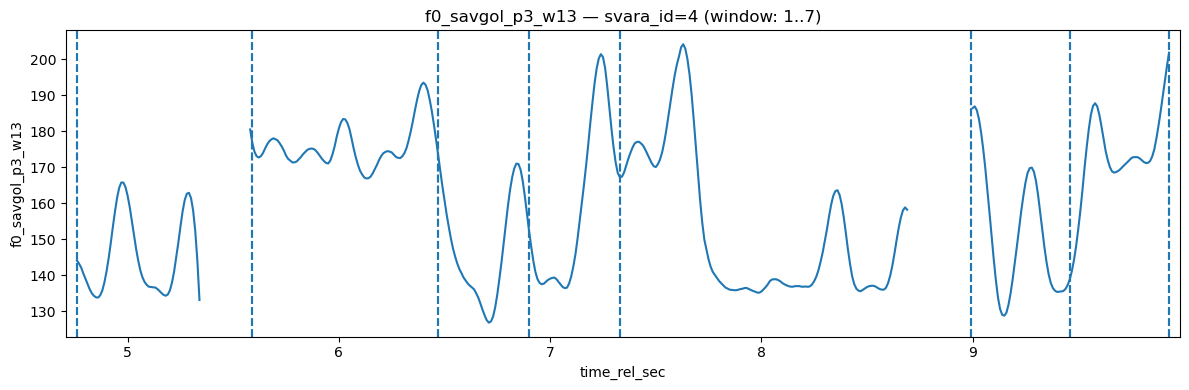

In [5]:

df_pitch = load_preprocessed_pitch(
    recording_id=SARASUDA_VARNAM[0],
    tonic_hz=SARASUDA_TONICS[SARASUDA_VARNAM[0]],
    convert_to_cents=True
)


plot_pitchcurve_svara_window(
    df_pitch = df_pitch,
    svara_id = 4,
    pitch_col = "f0_savgol_p3_w13",
    time_col = "time_rel_sec",
    svara_id_col = "svara_id",
    svara_start_label_col= "svara_start_label",
    svara_end_label_col = "svara_end_label",
    n = 6,
    figsize = (12, 4),
)

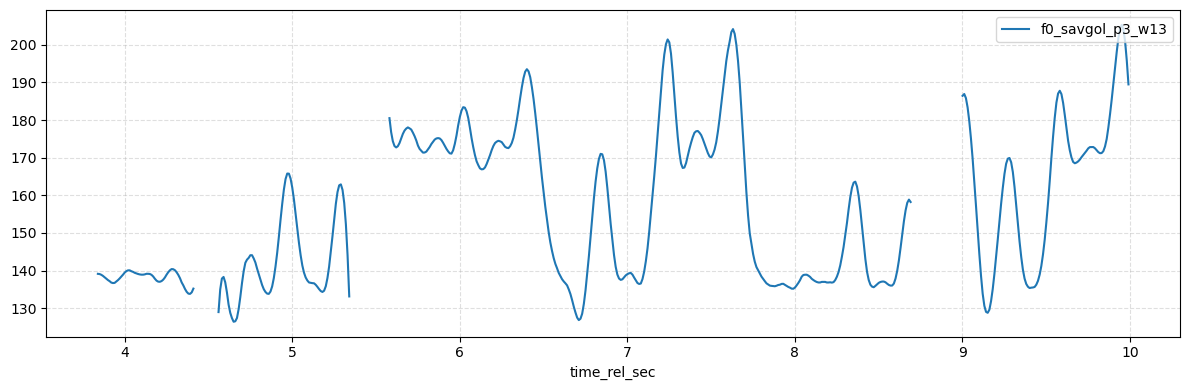

In [7]:
plot_segment_multiplot(
    df = df_pitch,
    main_cols = ["f0_savgol_p3_w13"],
    sub_cols=None,
    time_col="time_rel_sec",
    bool_markers=None,
    bool_marker_style=None,
    superpose=None,
    figsize=(12, 4),
    sharex=True,
    colors=None,
    styles=None,
    fill_under=None,
    title=None,
    time_window= (0, 10),   # <-- (t0, duracio)
)

: 